## Homework


Write you own **K-means** function. This time we will try to write a function to implement the K-means algorithm step by step.

1. The first step of K-means is to initialize some centroids randomly. 

We can sample some observation as centroids. Write a function **generate_centroid**, given a data set **features** and a number **k**, return **k** observations which are sampled from **features**. (*Hint: the function np.random.choice may be useful.*)

(300L, 2L)


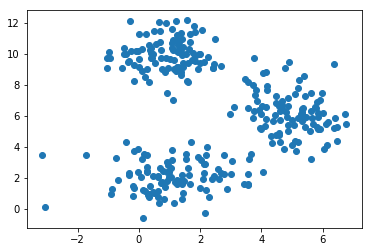

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# test dataset: 300 observations, 2 features, 3 clusters

mean1 = [1, 2]
cov1 = [[2, 0], [0, 1]]  # diagonal covariance
x1 = np.random.multivariate_normal(mean1, cov1, 100)

mean2 = [5, 6]
cov2 = [[1, 0], [0, 2]]  # diagonal covariance
x2 = np.random.multivariate_normal(mean2, cov2, 100)

mean3 = [1, 10]
cov3 = [[1, 0], [0, 1]]  # diagonal covariance
x3 = np.random.multivariate_normal(mean3, cov3, 100)

x = np.concatenate((x1,x2,x3),axis=0)

print x.shape

plt.scatter(x[:,0], x[:,1])
plt.show()


In [4]:
def generate_centroid(features, k):
    ## features: the original data, should be a array
    ## k: number of centroids
        
    centroid = features[np.random.choice(features.shape[0], k, replace=False), :]
    return centroid

2. The second step is calculating the distance between each observation and each centroid. 

Write a function **get_distance**, given a data set **features** and a parameter **centroid**, return the **distance** (the euclidean distance) between each observation and each centroid. The element of **distance** in the $i$th row and $j$th column should be the distance between $i$th observation and $j$th centroid.

In [5]:
def get_distance(features, centroid):
    ## features: the original data, should be a array
    ## centroid: the centroids of the clusters
    
    distance = np.zeros((features.shape[0],centroid.shape[0]))
    for i in range(centroid.shape[0]):
       distance[:,i]=np.sqrt(((features - centroid[i,:])**2).sum(axis=1))
    return distance

3. The third step is to label each observation by the closest cluster. Here is a function **get_label**, given a distance matrix, return the index of minimal number in each row. You need to do nothing in this step.

In [6]:
def get_label(distance):
    return distance.argmin(1) 

4. The fourth step is to update the centroids after labeling the observations. 

Write a function **get_centroid**, given a data set **features** and a parameter **label**, return the centroids of the cluster.

In [7]:
def get_centroid(features, label):
    # your code here #
    ###################
    # Here is an idea if you have no idea:
    # 1. get the unique labels
    # 2. get the length of the unique labels
    # 3. write a loop, calculate a centroid in each loop.
    # 4. return all the centroids
    ###################
    num_clusters = max(label) + 1
    centroid = np.zeros((num_clusters, features.shape[1]))
    for i in range(num_clusters):
        centroid[i,:] = np.mean(features[label==i], axis=0)
    return centroid

5. At last, write a function **kmeans** to combine the functions together. You do not need to do anything in this step.

(1) Given a data set **x** and a number **k**

(2) Generate **k** samples from the dataset

(3) Update the centroids and labels until it converge

(4) Return the label and centroids

In [64]:
label = get_label(distance)
get_centroid(x,label)

array([[  4.86079436,   7.37273919],
       [  0.84871276,  10.14337464],
       [  1.97012031,   2.80912911]])

In [9]:
def kmeans(x, k, centroid=None, max_iter=300):
    if centroid == None:
        centroid = generate_centroid(x, k)
    i = 0
    while i <= max_iter:
        i += 1
        distance = get_distance(x, centroid)
        label = get_label(distance)
        centroid_update = get_centroid(x, label)
        if np.all(centroid_update == centroid):
            break
        else:
            centroid = centroid_update
    return label, centroid

6.Test the **kmeans** function.

(1) Generate two groups of samples separately and combine them together

(2) Use the **kmeans** function to test the data set. Return the labels and centroids

(3) Make a scatter plot and color each observation by its group

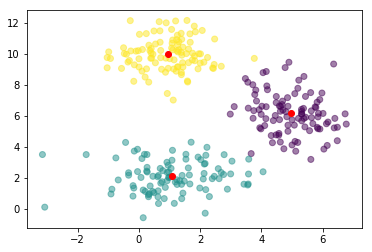

In [15]:
label, centroid = kmeans(x, 3, centroid=None, max_iter=300)

plt.scatter(x[:,0], x[:,1], c=label, alpha=0.5)
plt.scatter(centroid[:,0], centroid[:,1], color = 'red')
plt.show()